# Introducción a las redes RNN-LSTM 
### Análisis unidimensional y a un paso de la serie de tiempo del precio de Bitcoin.

## Contenido
### 1. Mostrando código para evitar desconección del cuaderno de Colab.
### 2. Importando paquetes y usando pandas_datareader para importar datos del Bitcoin.
### 3. Creación y explicación de la función "univariate_data()" para la preparación de datos.
### 4. Preparación de los datos, modificando su formato y creación del modelo (RNN-LSTM).
### 5. Definición y uso de funciones graficadoras.
### 6. Creación, entrenamiento y grabación de datos de predicción de modelos con 8, 128 y 256 neuronas en su capa intermedia y posterior eliminación del modelo.
### 7. Graficas perdida vs epochs.
### 8. Gráfica y resultados comparativos de las predicciones de los 3 modelos.

## A lo largo del cuaderno se dejan unas celdas para uso posible en caso de que ciertos paquetes dejen de funcionar en el futuro. Algunas de estas celdas contienen:

### a. Instalando 'yfinance' y usándolo para importar datos del Bitcoin (utilizando Ticker y get_data_yahoo).
### b. Prueba para importar múltiples datos (opcional).

In [ ]:
#Source: https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82#0d57
#Stop Colab from disconecting:
#ctl+shift+i -> console -> command lines:
function KeepClicking(){
console.log("Clicking");
document.querySelector("colab-connect-button").click()
}
setInterval(KeepClicking,60000)

### *Importando paquetes:*

In [1]:
#To import data
!pip install pandas_datareader #For COLAB
import pandas_datareader.data as web
#Data managing
import numpy as np
import os
import pandas as pd
#To comparison forecasts
from sklearn.metrics import mean_squared_error
#Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
#Importing images
from google.colab import files
from io import BytesIO
from PIL import Image
#RNN
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

#I dont know for what are these packages
import seaborn as sns
import time
import gc
import sys

print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

#Setting figure size
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

Tensorflow Version: 2.5.0
Pandas Version: 1.1.5
Numpy Version: 1.19.5
System Version: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]




### *Instalando yfinance:*

In [ ]:
#DEL (in my opinion, it's better use this library)
#installing yfinance (Colab)
!pip install yfinance
#pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3MB 13.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=837d6c375c78518e36a61bb69c3b82ab4d74a58c7316642ea7277d30771f0fae
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


### *Importando y visualizando datos del bitcoin:*


In [2]:
#Univariate time series
btc_usd = web.DataReader("BTC-USD", 'yahoo')
#print(type(btc_usd))
btc_usd.head()
#btc_usd.sort_index(ascending=False).head()

#NOTE: Check that index is date by default

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-12,716.004028,664.487000,671.653992,704.375977,243295008.0,704.375977
2016-06-13,704.504028,662.804016,704.504028,685.559021,186694000.0,685.559021
2016-06-14,696.302979,672.560974,685.684998,694.468994,99223800.0,694.468994
2016-06-15,773.721985,696.523010,696.523010,766.307983,271633984.0,766.307983
2016-06-16,775.356018,716.556030,768.487000,748.908997,363320992.0,748.908997


## (Opcional):
La siguiente celda se puede omitir pues solo muestra la aplicación de unos métodos para series de tiempo univariadas (usando Ticker) y como importar series de tiempo multivariadas:

In [ ]:
###NOTE: minimum interval: 1 minute
#------------------------
#Univariate time series
#------------------------
btc_usd_T = yf.Ticker("BTC-USD")
#type(btc_usd)
#Exploring some methods
#btc_usd.info
#btc_usd.actions
#btc_usd.financials
#btc_usd.history(period="max")
#btc_usd.calendar
#### valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#btc_usd.history(period="2d",interval="1m") 

#-------------------------
#Multivariate time series
#-------------------------

#Several time series
starDate="2017-01-01" #year-month-day
endDate="2017-04-30"
data = web.DataReader("BTC-USD ETH-USD", start=starDate, end=endDate)
print(data)
#print(data["Adj Close"])
#print(type(data["Adj Close"]["BTC-USD"]))
#print(data["Adj Close"]["BTC-USD"])
#dataTickers = yf.Tickers('BTC-USD ETH-USD')
#print(dataTickers.tickers["BTC-USD"].info)
#print(dataTickers.tickers["ETH-USD"].history(period="1mo"))

[*********************100%***********************]  2 of 2 completed


## (Opcional):
En caso de presentar problemas importando los datos con 'web.DataReader()' se pueden usar los siguientes métodos:

In [ ]:
#DEL
import yfinance as yf

from pandas_datareader import data as pdr

yf.pdr_override() # <== that's all it takes :-)

#Univariate time series
#One way - get_data_yahoo:
btc_usd = pdr.get_data_yahoo("BTC-USD")
print(type(btc_usd))
btc_usd.head()
#btc_usd.sort_index(ascending=False).head()



[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## Registros diarios (uno por día)
Como se puede ver hay se tienen 1822 registros diarios del Bitcoin (desde el 2016 hasta la fecha):

In [ ]:
btc_usd.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1821.000000,1821.000000,1821.000000,1821.000000,1.821000e+03,1821.000000
mean,10537.649046,9918.414964,10242.635129,10261.200324,1.707552e+10,10261.200324
std,13045.021107,12160.166335,12640.317646,12651.538426,2.124489e+10,12651.538426
min,573.359985,531.333984,548.656006,547.465027,3.397780e+07,547.465027
25%,3654.933105,3539.721436,3600.372803,3601.013672,1.905040e+09,3601.013672
50%,7427.939453,7112.735840,7277.197754,7276.802734,8.399768e+09,7276.802734
75%,10434.922852,9946.675781,10227.479492,10233.599609,2.456992e+10,10233.599609
max,64863.097656,62208.964844,63523.753906,63503.457031,3.509679e+11,63503.457031


## Función de preparación de datos (ya estandarizados o normalizados) para análisis univariado (*candidata a exportar*)

Saving univ_data.jpg to univ_data.jpg


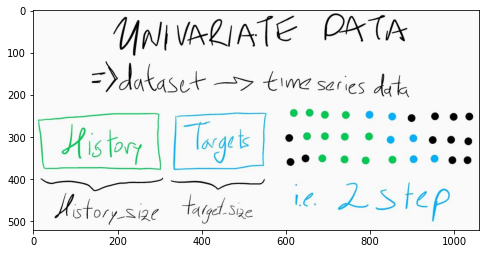

In [ ]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded["univ_data.jpg"]))
plt.imshow(im)

In [3]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  ''' 
      dataset: Array containing the whole time series (stadarized or not)
      start_index: index from where data start to analize
      end_index: final index to take data. None is to take all data
      history_size: window size to create sequence (and then used to predict)
      target_size: size of data to predict
  '''
  hist = [] #hist = history
  targets = [] 

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    #window = window of time
    window = range(i-history_size,i) #it balances the start_index = start_index + history_size made above
    #print(window,i)
    #print(window)
    #Reshape hist from (history_size,) to (history_size,1)
    hist.append(np.reshape(dataset[window], (history_size, 1))) #len(dataset[window]) = history_size
    #print(hist)
    targets.append(dataset[i+target_size-1])
  return np.array(hist), np.array(targets)

Mirando como trabaja la función univariate_data haciendo una prueba:

In [ ]:
test = np.arange(0,10)
#print(type(test))
#print(test)
#print(test[range(0,4)]) #equivalent to dataset[window]
#print(np.reshape(test[range(0,4)], (4,1)))
#print(test.shape[])
#x,y = univariate_data(dataset=test, start_index=0, end_index=8, history_size=4,target_size=1)
#print(x)
#print(y)
#a = range(-5,5)

### Seleccionando los datos de la serie de tiempo a analizar

Date
2021-06-08    37345.121094
2021-06-09    36702.597656
2021-06-12    35750.300781
Name: Adj Close, dtype: float64


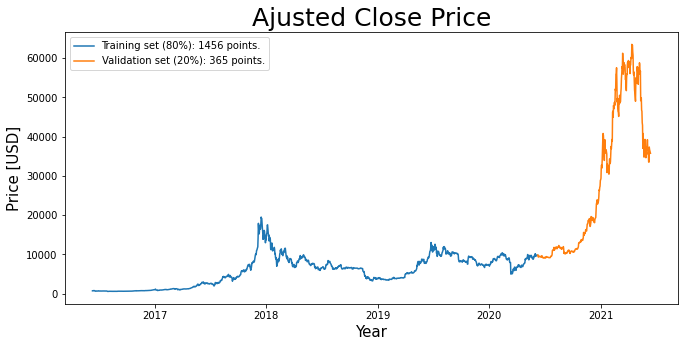

<class 'numpy.ndarray'>


In [4]:
#Extrating data from data frame:
uni_data = btc_usd['Adj Close']
print(uni_data.tail(3))

#-----Indexing (If index is not 'Date'): I THINK IT IS NOT NECCESARY
#print(uni_data.index)
uni_data.index = pd.to_datetime(uni_data.index,format='%Y-%m-%d')
#print(uni_data.index)
#uni_data.index = btc_usd['Date']
#print(uni_data.head())

#Hiperparameter
TRAIN_SPLIT = int(len(btc_usd)*0.8)

#Plotting
plt.figure(figsize=(11,5))
plt.plot(uni_data[:TRAIN_SPLIT], label="Training set (80%): "+str(TRAIN_SPLIT)+" points.")
plt.plot(uni_data[TRAIN_SPLIT:], label="Validation set (20%): "+str(len(btc_usd)-TRAIN_SPLIT)+" points.")
plt.title("Ajusted Close Price", size=25)
plt.xlabel("Year", size=15)
plt.ylabel("Price [USD]", size=15)
plt.legend()
plt.show()

#Extracting data as array
uni_data = uni_data.values
print(type(uni_data))

## (Hiper)Parámetros para la red LSTM

In [5]:
#Data load params
BATCH_SIZE = 256
BUFFER_SIZE = 10000
#TRAIN_SPLIT = int(len(btc_usd)*0.8) #Put before
#print(TRAIN_SPLIT)
#print(type(TRAIN_SPLIT))
#print(2424*0.8)

#LSTM params
EVALUATION_INTERVAL = 200 #FOR WHAT?
EPOCHS = 100
PATIENCE = 5 #FOR WHAT?

#Seeding for reproducibility
SEED = 13
tf.random.set_seed(SEED)


## Estandarización (Crear una función *Candidata a exportar*).
Nota: se hace con los datos de entrenamiento.

In [6]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
#print(uni_train_mean)
uni_data = (uni_data - uni_train_mean)/uni_train_std

## Creando los datos (entrenamiento y validación) para la predicción a 1 paso

In [7]:
#Defining history and target size
uni_past_history = 20
uni_future_target = 1 #I DONT KNOW WHY 0 AND NOT 1

#Creating training data
x_train_single_uni, y_train_single_uni = univariate_data(dataset = uni_data, start_index = 0, 
                                           end_index = TRAIN_SPLIT, history_size=uni_past_history,
                                           target_size = uni_future_target)

#Creating validation (for prediction) data
x_val_single_uni, y_val_single_uni = univariate_data(dataset = uni_data, start_index = TRAIN_SPLIT,
                                       end_index = None, history_size = uni_past_history,
                                       target_size = uni_future_target)

#Checking shape
print(uni_data.shape)
print(x_train_single_uni.shape)
print(y_train_single_uni.shape)

(1821,)
(1436, 20, 1)
(1436,)


## Modificando el formato de los datos usando TensorFlow para el uso de RNN-LSTM

In [8]:
#Train data
train_single_uni = tf.data.Dataset.from_tensor_slices((x_train_single_uni, y_train_single_uni))
train_single_uni = train_single_uni.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#Validation data
val_single_uni = tf.data.Dataset.from_tensor_slices((x_val_single_uni,y_val_single_uni))
val_single_uni = val_single_uni.batch(BATCH_SIZE).repeat()

print(train_single_uni)
print(val_single_uni)
print(val_single_uni.take(1))

<RepeatDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>
<TakeDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>


In [ ]:
#Understanding batches and univariate data in tensorflow format
#TRAIN_SPLIT = int(len(btc_usd)*0.8)
VAL_SPLIT = len(btc_usd) - TRAIN_SPLIT
print(TRAIN_SPLIT,VAL_SPLIT,89+256+20)
#print(type(VAL_SPLIT))
for x,y in val_single_uni.take(2): #x and y are the 2 batches of data
  print(len(x))
  #print(x)
  print(x[0])
  print(x[1])
  print("YYYYYYYYY")
  print(y)

1456 365 365
256
tf.Tensor(
[[9771.48925781]
 [9795.70019531]
 [9870.09472656]
 [9321.78125   ]
 [9480.84375   ]
 [9475.27734375]
 [9386.78808594]
 [9450.70214844]
 [9538.02441406]
 [9480.25488281]
 [9411.84082031]
 [9288.01855469]
 [9332.34082031]
 [9303.62988281]
 [9648.71777344]
 [9629.65820312]
 [9313.61035156]
 [9264.81347656]
 [9162.91796875]
 [9045.390625  ]], shape=(20, 1), dtype=float64)
tf.Tensor(
[[9795.70019531]
 [9870.09472656]
 [9321.78125   ]
 [9480.84375   ]
 [9475.27734375]
 [9386.78808594]
 [9450.70214844]
 [9538.02441406]
 [9480.25488281]
 [9411.84082031]
 [9288.01855469]
 [9332.34082031]
 [9303.62988281]
 [9648.71777344]
 [9629.65820312]
 [9313.61035156]
 [9264.81347656]
 [9162.91796875]
 [9045.390625  ]
 [9143.58203125]], shape=(20, 1), dtype=float64)
YYYYYYYYY
tf.Tensor(
[ 9143.58203125  9190.85449219  9137.99316406  9228.32519531
  9123.41015625  9087.30371094  9132.48828125  9073.94238281
  9375.47460938  9252.27734375  9428.33300781  9277.96777344
  9278.807617

# Definiendo funciones (*candidatas a exportar*) para graficar prediccion y pérdida

In [ ]:
#understanding create_time_steps
#print(list(range(-10,0)))
#---- Enumerate
a = [[[1,2,3,4,5]],[[10]],[[20,30,40]]]
print(a)
#print(type(a))
#print(a[0].flatten()) #error, because a[0] is not a column
#print(enumerate(a))
#enumerate is like a vector of couples like: (index, data)
for i,x in enumerate(a):
  print(i)
  print(x)
  print("end")
#----- numbers, boolean, conditional values and if
print(1==True)
print(0==False)
print(2==False)
if 3:
  print("a")

[[[1, 2, 3, 4, 5]], [[10]], [[20, 30, 40]]]
0
[[1, 2, 3, 4, 5]]
end
1
[[10]]
end
2
[[20, 30, 40]]
end
True
True
False
a


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

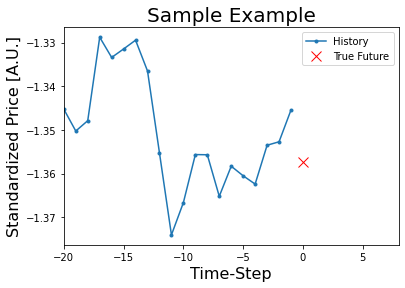

In [9]:
#CHANGE  ITS NAME (see 2d file), add axis label with certain size and set title size up
def create_time_steps(length):
  return list(range(-length,0))

def plot_short_pred(plot_data, delta, title):
  #This function plots 3 things: History, true future and prediction
  '''
      plot_data (list): [x,y,z]: data to plot in function of time (time_steps).
      delta: (0 = False & 1 = True) I think related with 'univariate_future_target' 
      title (str): plot title.
  '''
  #print(type(plot_data))
  #print(plot_data[0])
  #print(plot_data[0].flatten())
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  #print(plot_data[0].shape[0])
  #print(plot_data[0].shape)
  if delta:
    future = delta
  else:
    future = 0
  plt.title(title, size=20)
  
  for i,x in enumerate(plot_data): #enumerate(plot_data) = (0,x_train),(1,y_train)
    #Note: i = 0 is false, the rest (i.e. i=300) is true
    if i: #(i = 1)
      plt.plot(future, plot_data[i], marker[i],markersize=10, label=labels[i]) #Plotting true future
    else: #(i=0)
      plt.plot(time_steps,plot_data[i].flatten(),marker[i], label=labels[i]) #Plotting History
    plt.legend()
    plt.xlim([time_steps[0], (future+4)*2])
    plt.xlabel('Time-Step', size=16)
    plt.ylabel("Standardized Price [A.U.]", size=16)

  return plt

#Testing function
plot_short_pred([x_train_single_uni[0], y_train_single_uni[0]], 0, 'Sample Example')

## Función que gráfica la perdida en los datos de entrenamiento y validación

In [10]:
def plot_loss(history, title):
  #print(history.history)
  loss = history.history['loss']
  #print(loss)
  val_loss = history.history['val_loss']
  #print(val_loss)

  epochs = range(len(loss))
  #print(epochs)

  #1st y axis (training loss)
  fig, ax1 = plt.subplots()
  col1 = "red"
  ax1.set_xlabel("Epoch", size=15)
  ax1.set_ylabel("Training Loss", color=col1, size=20)
  ax1.plot(epochs,loss, color=col1, marker = 'o')
  ax1.tick_params(axis='y', labelcolor=col1)

  #2nd y axis (val loss)
  ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
  col2 = "blue"
  ax2.set_ylabel("Val. Loss", color=col2, size=20)
  ax2.plot(epochs, val_loss, color=col2, marker = "o")
  ax2.tick_params(axis='y', labelcolor=col2)
  plt.title(title, size=19)
  #fig.tight_layout()
  plt.show()

## Función de creación del modelo RNN-LSTM con un número de neuronas dado (*Candidata a exportar*)

In [11]:
def my_model(n_of_neurons, in_shape):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.LSTM(units=n_of_neurons, input_shape=in_shape))
  model.add(tf.keras.layers.Dense(1))
  return model


### Creación del modelo, entrenamiento, predicción y eliminación del modelo con 8 neuronas en su capa intermedia

In [12]:
#in_shape=x_train_single_uni.shape[-2:]
%%time
single_step_1D_model = my_model(n_of_neurons=8, in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#training
#To Stop training when a monitored metric has stopped improving.
#Patience: Number of epochs with no improvement after which training will be stopped.
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)

single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)
#what steps_per_epoch mean?, what callbacks?, whats validation_step ?

#saving predictions (8 neurons)
predictions8U = single_step_1D_model.predict(x_val_single_uni)

Epoch 1/100
200/200 [==============================] - 9s 6ms/step - loss: 0.3490 - val_loss: 5.5000
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0965 - val_loss: 5.1113
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0742 - val_loss: 4.7046
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0646 - val_loss: 4.4839
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0583 - val_loss: 4.0617
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0546 - val_loss: 3.8251
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0526 - val_loss: 3.7771
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0512 - val_loss: 3.7356
Epoch 9/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0502 - val_loss: 3.6989
Epoch 10/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0497 - val_lo

In [13]:
print(single_step_1D_model_history.history['loss'])
#single_step_1D.history.history

[0.3489745259284973, 0.0964616909623146, 0.07418343424797058, 0.06463509798049927, 0.058282747864723206, 0.05461755767464638, 0.05257461965084076, 0.05116093158721924, 0.05018441751599312, 0.04965312406420708, 0.04919809848070145, 0.04891252517700195, 0.048690248280763626, 0.048465874046087265, 0.04846302047371864, 0.048350997269153595, 0.04823753982782364, 0.04813843220472336, 0.04805613309144974, 0.04829820990562439, 0.048048656433820724, 0.04795398563146591, 0.04800897836685181, 0.047763265669345856, 0.047837648540735245, 0.04774798825383186, 0.04765057936310768, 0.047670427709817886, 0.04772907868027687, 0.04762404039502144, 0.047500159591436386, 0.04765516147017479, 0.04751081392168999, 0.04759000241756439, 0.04738340899348259, 0.04745016619563103, 0.04730279743671417, 0.04752323776483536, 0.04736172407865524, 0.04735783487558365, 0.04731203243136406, 0.0473097562789917, 0.04732930287718773, 0.047320831567049026, 0.047270819544792175, 0.04724656045436859, 0.04717181995511055, 0.04

### Gráfica de la pérdida en función de las epochs

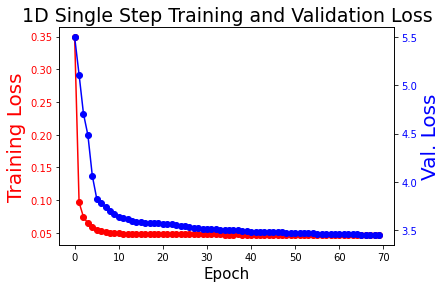

In [14]:
plot_loss(history=single_step_1D_model_history, title='1D Single Step Training and Validation Loss')

In [15]:
#Checking prediction shape
for x,y in val_single_uni.take(1):
  print(single_step_1D_model.predict(x).shape)
  #print(simple_lstm_model.predict(x))

(256, 1)


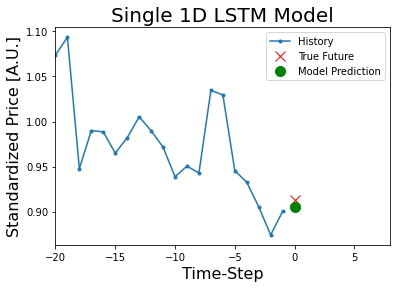

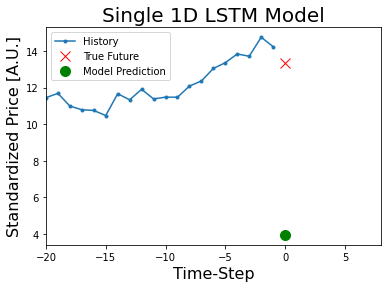

In [16]:
#print(val_univariate.take(1))
#val_univariate.take(k) is like a vector of k first components containing (x_val,y_val) 
for x,y in val_single_uni.take(2):
  plot = plot_short_pred(plot_data=[x[0].numpy(),y[0].numpy(),single_step_1D_model.predict(x)[0]], delta=0, title='Single 1D LSTM Model')
  plot.show()

In [17]:
#deleting model
del single_step_1D_model

### Creación del modelo, entrenamiento, predicción y eliminación del modelo con 128 neuronas en su capa intermedia (en forma sucinta).

In [18]:
%%time
tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=128,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#training
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#saving predictions (128 neurons)
predictions128U = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.1017 - val_loss: 1.9901
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0605 - val_loss: 1.7363
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0537 - val_loss: 1.5946
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0502 - val_loss: 1.5547
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0501 - val_loss: 1.5662
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0491 - val_loss: 1.5627
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0498 - val_loss: 1.5856
CPU times: user 9.87 s, sys: 672 ms, total: 10.5 s
Wall time: 12.2 s


### Gráfica de la pérdida en función de las epochs

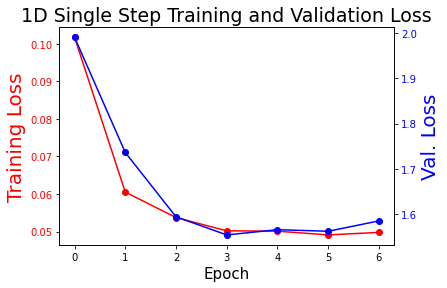

In [19]:
plot_loss(single_step_1D_model_history, '1D Single Step Training and Validation Loss')

### Creación del modelo, entrenamiento, predicción y eliminación del modelo con 256 neuronas en su capa intermedia (en forma sucinta).

In [20]:
%%time
tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=256,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#Training
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#saving predictions (256 neurons)
predictions256U = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

Epoch 1/100
200/200 [==============================] - 3s 9ms/step - loss: 0.0948 - val_loss: 1.4100
Epoch 2/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0600 - val_loss: 1.1150
Epoch 3/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0523 - val_loss: 1.0657
Epoch 4/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0502 - val_loss: 1.2461
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.0495 - val_loss: 1.4083
Epoch 6/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0484 - val_loss: 1.3362
CPU times: user 10.1 s, sys: 575 ms, total: 10.6 s
Wall time: 12.1 s


### Gráfica de la pérdida en función de las epochs

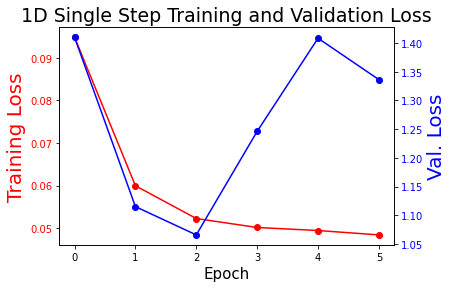

In [21]:
plot_loss(history=single_step_1D_model_history, title='1D Single Step Training and Validation Loss')

## Graficando predicciones y función MSE

### Configurando dataframes para obtener series de tiempo (y no solo arrays):

In [23]:
##To plot train and validation data together with models predictions

#------- Creating dframes (to work with time series) with standirized data
#dframes lengths
N = len(btc_usd)
M = len(predictions8U)

#data dataframe
data_std = pd.DataFrame(index=btc_usd.index,columns=['AdjCloStd']) #standarized #try to change index to date since this line
train = data_std[:TRAIN_SPLIT]
valid = data_std[TRAIN_SPLIT:]

#predictions dataframe
predictions = pd.DataFrame(index=btc_usd.tail(M).index,columns=['Pred8U', 'Pred128U', 'Pred256U'])#try to change index to date since this line

#Filling data dataframe
for i in range(0,N):
  data_std['AdjCloStd'][i] = uni_data[i]

#Filling predictions dataframe
predictions['Pred8U'] = predictions8U
predictions['Pred128U'] = predictions128U
predictions['Pred256U'] = predictions256U

### Graficando serie de tiempo y predicciones:

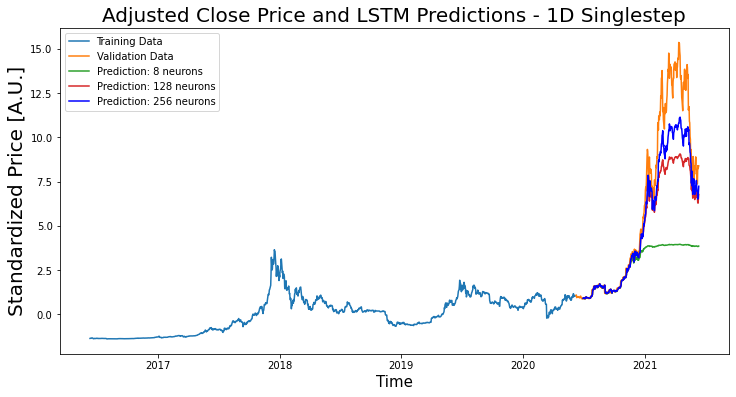

In [24]:
plt.figure(figsize=(12,6))
plt.plot(train['AdjCloStd'], label="Training Data")
plt.plot(valid['AdjCloStd'], label="Validation Data")
plt.plot(predictions['Pred8U'], label="Prediction: 8 neurons")
plt.plot(predictions['Pred128U'], label="Prediction: 128 neurons")
plt.plot(predictions['Pred256U'], label="Prediction: 256 neurons", color='blue')
plt.title("Adjusted Close Price and LSTM Predictions - 1D Singlestep", size=20)
plt.ylabel("Standardized Price [A.U.]", size=20)
plt.xlabel("Time", size=15)
plt.legend()
plt.show()

### Graficando datos de validación y predicciones

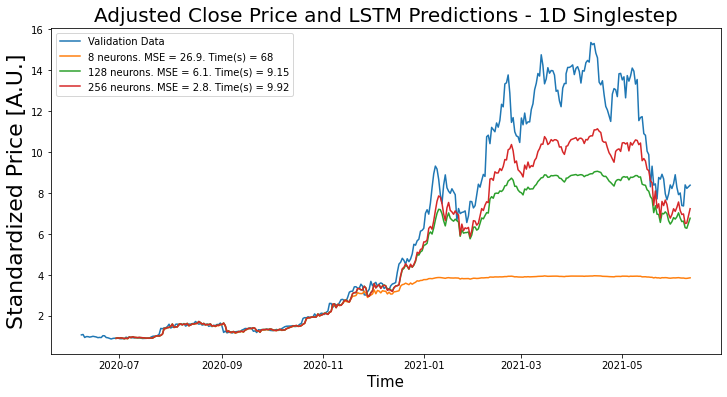

In [25]:
#training time
T_8U = 68
T_128U = 9.15
T_256U = 9.92

#MSE Calculations
MSE_8U = round(mean_squared_error(y_val_single_uni, predictions8U , squared=True),1) 
MSE_128U = round(mean_squared_error(y_val_single_uni, predictions128U , squared=True),1)
MSE_256U = round(mean_squared_error(y_val_single_uni, predictions256U , squared=True),1)

#Plotting
plt.figure(figsize=(12,6))
plt.plot(valid['AdjCloStd'], label="Validation Data")
plt.plot(predictions['Pred8U'], label="8 neurons. MSE = "+str(MSE_8U)+". Time(s) = "+str(T_8U))
plt.plot(predictions['Pred128U'], label="128 neurons. MSE = "+str(MSE_128U)+". Time(s) = "+str(T_128U))
plt.plot(predictions['Pred256U'], label="256 neurons. MSE = "+str(MSE_256U)+". Time(s) = "+str(T_256U))
plt.title("Adjusted Close Price and LSTM Predictions - 1D Singlestep", size=20)
plt.ylabel("Standardized Price [A.U.]", size=22)
plt.xlabel("Time", size=15)
plt.legend()
plt.show()
#print(y_train_uni.size)
#print(y_val_uni.size)

# END THIS THING
# Por que con muchas neuronas (desde 512 hacia arriba) el resultado de la predicción cambiaba mucho al correr el modelo varias veces?

#Para 128 neuronas:

In [18]:
%%time
###################### 1ND MODEL ##################################
#CREATING MODEL
#tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=128,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#TRAINING
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#PREDICTIONS
predictions128U_1 = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

###################### 2ND MODEL ##################################
#CREATING MODEL
#tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=128,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#TRAINING
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#PREDICTIONS
predictions128U_2 = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

###################### 3RD MODEL ##################################
#CREATING MODEL
#tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=128,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#TRAINING
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#PREDICTIONS
predictions128U_3 = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.1244 - val_loss: 2.0592
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0648 - val_loss: 1.8501
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0548 - val_loss: 1.6730
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0515 - val_loss: 1.6262
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0501 - val_loss: 1.6058
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0493 - val_loss: 1.5976
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0489 - val_loss: 1.6429
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0487 - val_loss: 1.6953
Epoch 9/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0481 - val_loss: 1.7566
Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.1053 - val_los

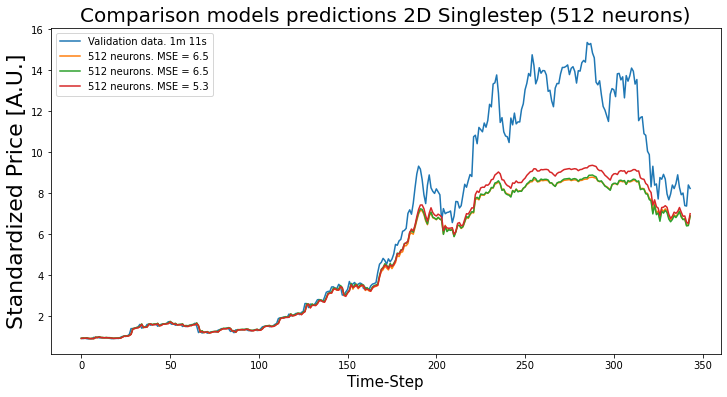

In [19]:
###################### PLOTTING ##################################
#MSE Calculations
MSE_512U_1 = round(mean_squared_error(y_val_single_uni, predictions128U_1 , squared=True),1)
MSE_512U_2 = round(mean_squared_error(y_val_single_uni, predictions128U_2 , squared=True),1)
MSE_512U_3 = round(mean_squared_error(y_val_single_uni, predictions128U_3 , squared=True),1) 

#Plotting
plt.figure(figsize=(12,6))
plt.plot(y_val_single_uni, label="Validation data. 1m 11s")
plt.plot(predictions128U_1, label="512 neurons. MSE = "+str(MSE_512U_1))
plt.plot(predictions128U_2, label="512 neurons. MSE = "+str(MSE_512U_2))
plt.plot(predictions128U_3, label="512 neurons. MSE = "+str(MSE_512U_3))
plt.title("Comparison models predictions 2D Singlestep (512 neurons)", size=20)
plt.ylabel("Standardized Price [A.U.]", size=22)
plt.xlabel("Time-Step", size=15)
plt.legend()
plt.show()

#Para 512 neuronas (problemático):


In [16]:
%%time
###################### 1ND MODEL ##################################
#CREATING MODEL
#tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=512,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#TRAINING
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#PREDICTIONS
predictions512U_1 = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

###################### 2ND MODEL ##################################
#CREATING MODEL
#tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=512,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#TRAINING
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#PREDICTIONS
predictions512U_2 = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

###################### 3RD MODEL ##################################
#CREATING MODEL
#tf.keras.backend.clear_session()
single_step_1D_model = my_model(n_of_neurons=512,in_shape=x_train_single_uni.shape[-2:])
single_step_1D_model.compile(optimizer='adam', loss='mae')

#TRAINING
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
single_step_1D_model_history = single_step_1D_model.fit(train_single_uni,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=EVALUATION_INTERVAL,
                                                    validation_data=val_single_uni,
                                                    callbacks=[early_stopping],
                                                    validation_steps=50)

#PREDICTIONS
predictions512U_3 = single_step_1D_model.predict(x_val_single_uni)

#deleting model
del single_step_1D_model

Epoch 1/100
200/200 [==============================] - 4s 15ms/step - loss: 0.0986 - val_loss: 1.3639
Epoch 2/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0582 - val_loss: 0.9264
Epoch 3/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0525 - val_loss: 0.8542
Epoch 4/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0510 - val_loss: 0.5921
Epoch 5/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0491 - val_loss: 0.9239
Epoch 6/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0478 - val_loss: 0.9302
Epoch 7/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0470 - val_loss: 0.8327
Epoch 1/100
200/200 [==============================] - 4s 15ms/step - loss: 0.0952 - val_loss: 1.0681
Epoch 2/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0584 - val_loss: 0.8300
Epoch 3/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0534

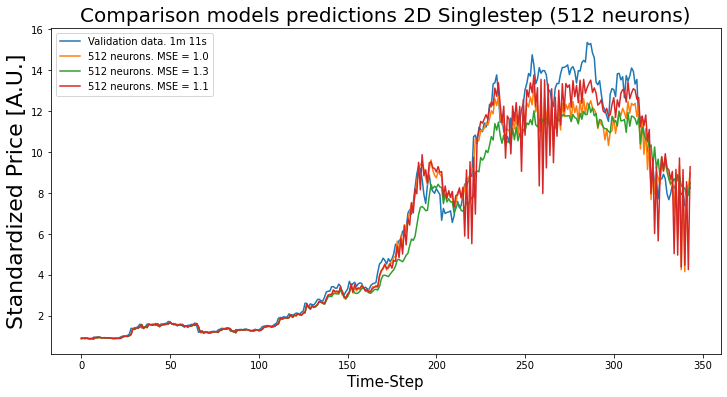

In [17]:
###################### PLOTTING ##################################
#MSE Calculations
MSE_512U_1 = round(mean_squared_error(y_val_single_uni, predictions512U_1 , squared=True),1)
MSE_512U_2 = round(mean_squared_error(y_val_single_uni, predictions512U_2 , squared=True),1)
MSE_512U_3 = round(mean_squared_error(y_val_single_uni, predictions512U_3 , squared=True),1) 

#Plotting
plt.figure(figsize=(12,6))
plt.plot(y_val_single_uni, label="Validation data. 1m 11s")
plt.plot(predictions512U_1, label="512 neurons. MSE = "+str(MSE_512U_1))
plt.plot(predictions512U_2, label="512 neurons. MSE = "+str(MSE_512U_2))
plt.plot(predictions512U_3, label="512 neurons. MSE = "+str(MSE_512U_3))
plt.title("Comparison models predictions 2D Singlestep (512 neurons)", size=20)
plt.ylabel("Standardized Price [A.U.]", size=22)
plt.xlabel("Time-Step", size=15)
plt.legend()
plt.show()

--------------------

## Cosas pendientes:
1. Hacer el mismo análisis (1D) pero multipaso.
2. Detección de series correlacionadas.
3. Analizar otras series (S&P500, JPMorgan, Gold, Apple, etc.)
4. Uso de redes LSTM (multidimensional) para hacer predicción 1 paso y multipaso.

## Conclusiones:
1. El modelo logra mejores predicciones cuando tiene mas neuronas en su capa intermedia hasta las 256 neuronas.
2. Modelos con 512 neuronas o mas arrojan predicciones variables. Es decir distintas predicciones cuando se compilan distintas veces.
3. Los resultados no son 100% repetibles.

## Bibliografía

### Redes RNN-LSTM (cuaderno).
1. [Introducción a Keras LSTM para series de tiempo multivariadas. Montenegro et.al.](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%205-%20Redes%20recurrentes/Cuadernos/rnrTimes_series_Multivariate.ipynb).
1. A. [Notebook community: Time series forecasting (Ori. English)](https://notebook.community/tensorflow/docs-l10n/site/en-snapshot/tutorials/structured_data/time_series).
1. B. [Keras Timeseries Multi-Step Multi-Output](https://www.kaggle.com/nicapotato/keras-timeseries-multi-step-multi-output).

### Yahoo Finance (datos importados).
2. [Yahoo Finance API – A Complete Guide](https://algotrading101.com/learn/yahoo-finance-api-guide/)
3. [yfinance Library – A Complete Guide](https://algotrading101.com/learn/yfinance-guide/)
4. [yfinance documentation](https://pypi.org/project/yfinance/)

### Cuadernos de referencia.
5. [Predicción de acciones usando análisis multivariado (repo)
](https://github.com/ninja3697/Stocks-Price-Prediction-using-Multivariate-Analysis). 
6. [Serie de tiempo multivariadas para predicción de precios en Python](https://www.relataly.com/stock-market-prediction-with-multivariate-time-series-in-python/1815/). 
7. [Conversión de datos (clima)](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/).
8. [Predicción en series de tiempo multivariadas (clima)](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/).
### Libro
9. [François Chollet - Deep Learning with Python](https://b-ok.lat/s/Deep%20Learning%20with%20Python%20Fran%C3%A7ois%20Chollet).
### Artículo
10. [Stock Price Prediction Using CONVOLUTIONAL Neural Networks on a Multivariate Timeseries. Article](https://www.researchgate.net/publication/338477393_Stock_Price_Prediction_Using_Convolutional_Neural_Networks_on_a_Multivariate_Timeseries). 
[]().


##Links sobre criptomonedas (bitcoin especialmente)
https://unperiodico.unal.edu.co/pages/detail/criptomonedas-una-herramienta-riesgosa-pero-de-uso-inminente/

https://repositorio.udesa.edu.ar/jspui/bitstream/10908/16022/1/%5BP%5D%5BW%5D%20T.%20M.%20AyPP.%20Lojo%20M%C3%A1rquez%2C%20Tamara%20In%C3%A9s.pdf  (cap2 c, cap3 ii, cap4)

https://www.daviescoin.io/es/blog/que-determina-el-valor-de-las-criptomonedas

https://www.tekcrispy.com/2018/05/16/que-determina-precio-criptomonedas/

https://repositorio.uniagustiniana.edu.co/bitstream/handle/123456789/845/HurtadoCuellar-AngieDaniela-2019.pdf.pdf?sequence=1 (cap7)
